### Basic imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data acquisition

In [2]:
df = pd.read_csv('credit_card.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [4]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [5]:
df.describe().T

count          mean           std  min        25%  \
step            1048575.0  2.696617e+01  1.562325e+01  1.0     15.000   
amount          1048575.0  1.586670e+05  2.649409e+05  0.1  12149.065   
oldbalanceOrg   1048575.0  8.740095e+05  2.971751e+06  0.0      0.000   
newbalanceOrig  1048575.0  8.938089e+05  3.008271e+06  0.0      0.000   
oldbalanceDest  1048575.0  9.781600e+05  2.296780e+06  0.0      0.000   
newbalanceDest  1048575.0  1.114198e+06  2.416593e+06  0.0      0.000   
isFraud         1048575.0  1.089097e-03  3.298351e-02  0.0      0.000   
isFlaggedFraud  1048575.0  0.000000e+00  0.000000e+00  0.0      0.000   

                      50%          75%         max  
step                20.00       39.000        95.0  
amount           76343.33   213761.890  10000000.0  
oldbalanceOrg    16002.00   136642.020  38900000.0  
newbalanceOrig       0.00   174599.990  38900000.0  
oldbalanceDest  126377.21   915923.475  42100000.0  
newbalanceDest  218260.36  1149807.510  42200000.0  
isFraud              0.00        0.000         1.0  
isFlaggedFraud       0.00        0.000         0.0

In [6]:
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
sum(df['nameOrig'] == df['nameDest'])

0

In [8]:
df['nameOrig'].apply(lambda x : x.split('C')[1]).value_counts()

nameOrig
1214450722    2
309111136     2
1268675361    2
720460198     2
1109092856    2
             ..
560131732     1
455251560     1
650578540     1
1883668225    1
1264356443    1
Name: count, Length: 1048317, dtype: int64

In [9]:
df['Dest_0'] = df['nameDest'].apply(lambda x : x[0])

In [10]:
dest_count = df['nameDest'].value_counts()

In [11]:
df['Unique_dest'] = df['nameDest'].apply(lambda x : 1 if dest_count[x] == 1 else 0) 

In [12]:
df['Unique_dest'].value_counts()

Unique_dest
0    677211
1    371364
Name: count, dtype: int64

In [13]:
df['Dest_0'].value_counts()

Dest_0
C    694702
M    353873
Name: count, dtype: int64

In [14]:
df.drop('isFlaggedFraud',axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  Dest_0          1048575 non-null  object 
 11  Unique_dest     1048575 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 96.0+ MB


In [16]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [17]:
#change in balance for origin
df['Delta_bal_orig'] = abs(df['newbalanceOrig'] - df['oldbalanceOrg'])

In [18]:
df['Delta_bal_dest'] = abs(df['newbalanceDest'] - df['oldbalanceDest'])

In [19]:
df.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud Dest_0  Unique_dest  Delta_bal_orig  Delta_bal_dest  
0             0.0        0      M            1         9839.64             0.0  
1             0.0        0      M            1         1864.28             0.0  
2             0.0        1      C            0          181.00             0.0  
3             0.0        1      C            0          181.00         21182.0  
4             0.0        0      M            1        11668.14             0.0

In [20]:
sum(df['Delta_bal_orig'] == abs(df['amount']))

146470

In [21]:
df.groupby('type')['amount'].describe()

count           mean            std   min          25%  \
type                                                                  
CASH_IN   227130.0  169923.648522  128433.660073  1.42   70368.8075   
CASH_OUT  373641.0  184039.592505  163347.499327  0.37   76237.2600   
DEBIT       7178.0    5878.516989   16259.998132  0.87    1617.2425   
PAYMENT   353873.0   11122.907151    9814.446125  0.10    4062.5900   
TRANSFER   86753.0  634403.832422  608068.255544  2.60  203422.9400   

                 50%        75%          max  
type                                          
CASH_IN   143609.760  240644.85   1781905.26  
CASH_OUT  154200.130  258654.92  10000000.00  
DEBIT       3247.175    5692.96    569077.51  
PAYMENT     8597.620   15284.31    115264.68  
TRANSFER  460761.850  880790.36  10000000.00

In [22]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
Dest_0            0
Unique_dest       0
Delta_bal_orig    0
Delta_bal_dest    0
dtype: int64

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048460 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048460 non-null  int64  
 1   type            1048460 non-null  object 
 2   amount          1048460 non-null  float64
 3   oldbalanceOrg   1048460 non-null  float64
 4   newbalanceOrig  1048460 non-null  float64
 5   oldbalanceDest  1048460 non-null  float64
 6   newbalanceDest  1048460 non-null  float64
 7   isFraud         1048460 non-null  int64  
 8   Dest_0          1048460 non-null  object 
 9   Unique_dest     1048460 non-null  int64  
 10  Delta_bal_orig  1048460 non-null  float64
 11  Delta_bal_dest  1048460 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 104.0+ MB


### EDA

In [25]:
cat_cols = ['type','Dest_0','Unique_dest']
num_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','Delta_bal_orig','Delta_bal_dest']
target = ['isFraud']

In [26]:
def plot_box(df):
    numerical_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','Delta_bal_orig','Delta_bal_dest']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(20,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='isFraud',y=column,data=df,palette='rocket', linewidth=2.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

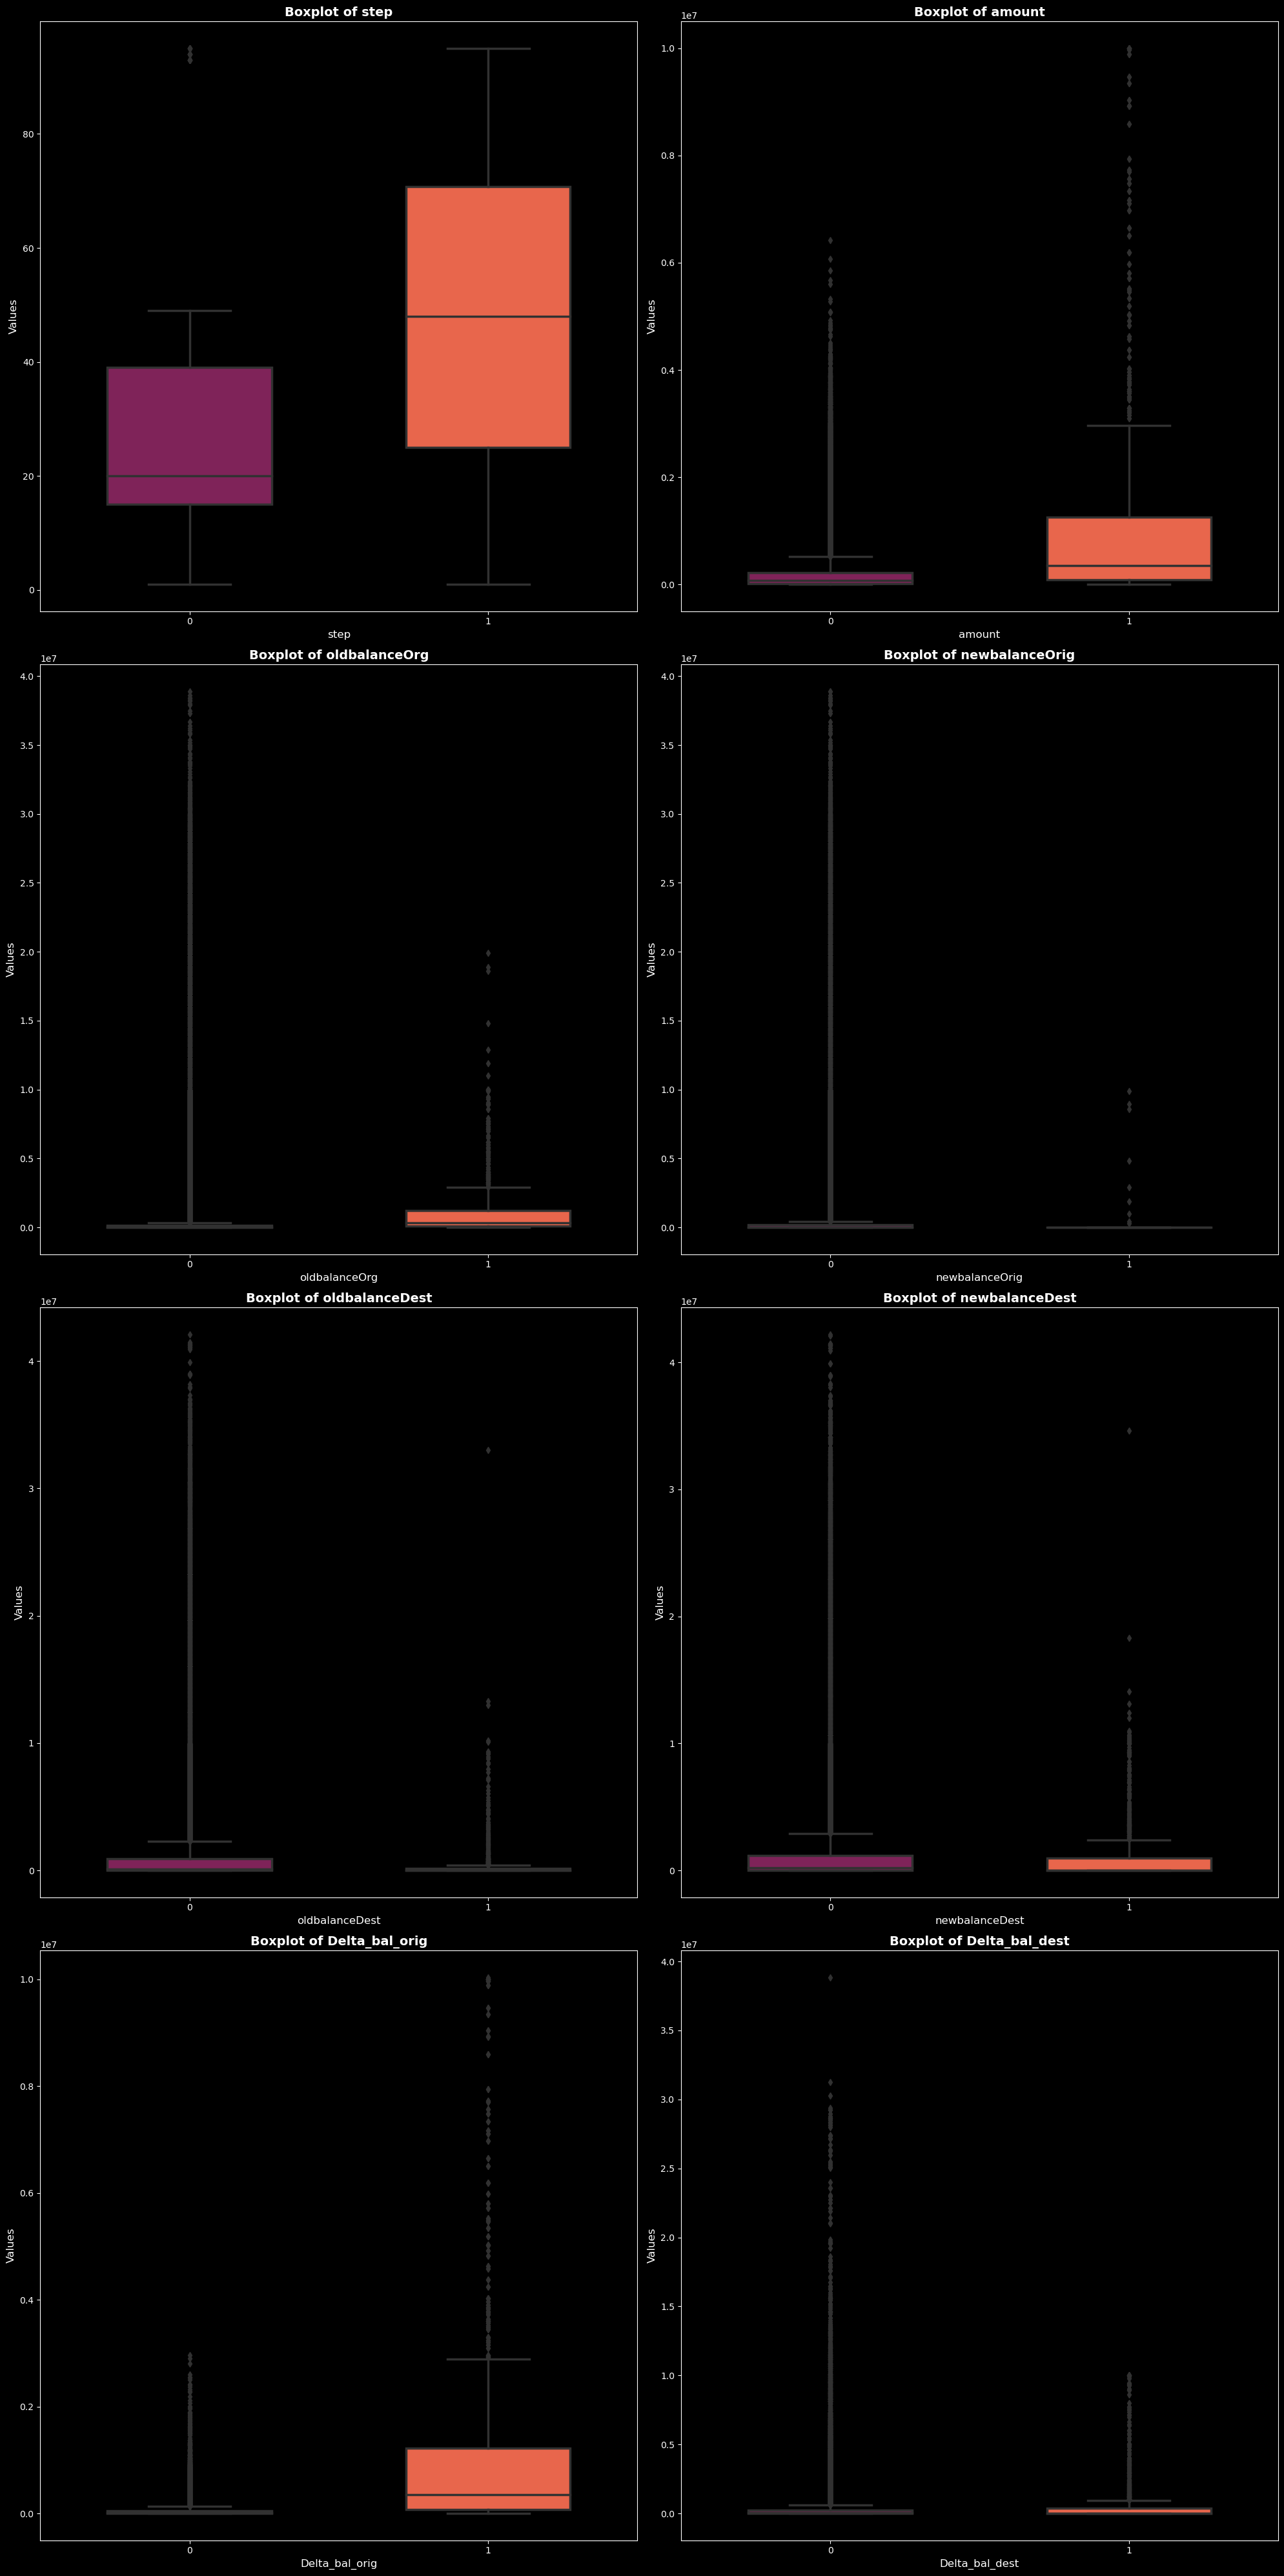

In [27]:
plot_box(df)

In [28]:
def plot_hist(df):
    numerical_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','Delta_bal_orig','Delta_bal_dest']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(20,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='winter_r',hue='isFraud',kde=True,bins=70,ax=ax)
        ax.set_title(f'Histplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

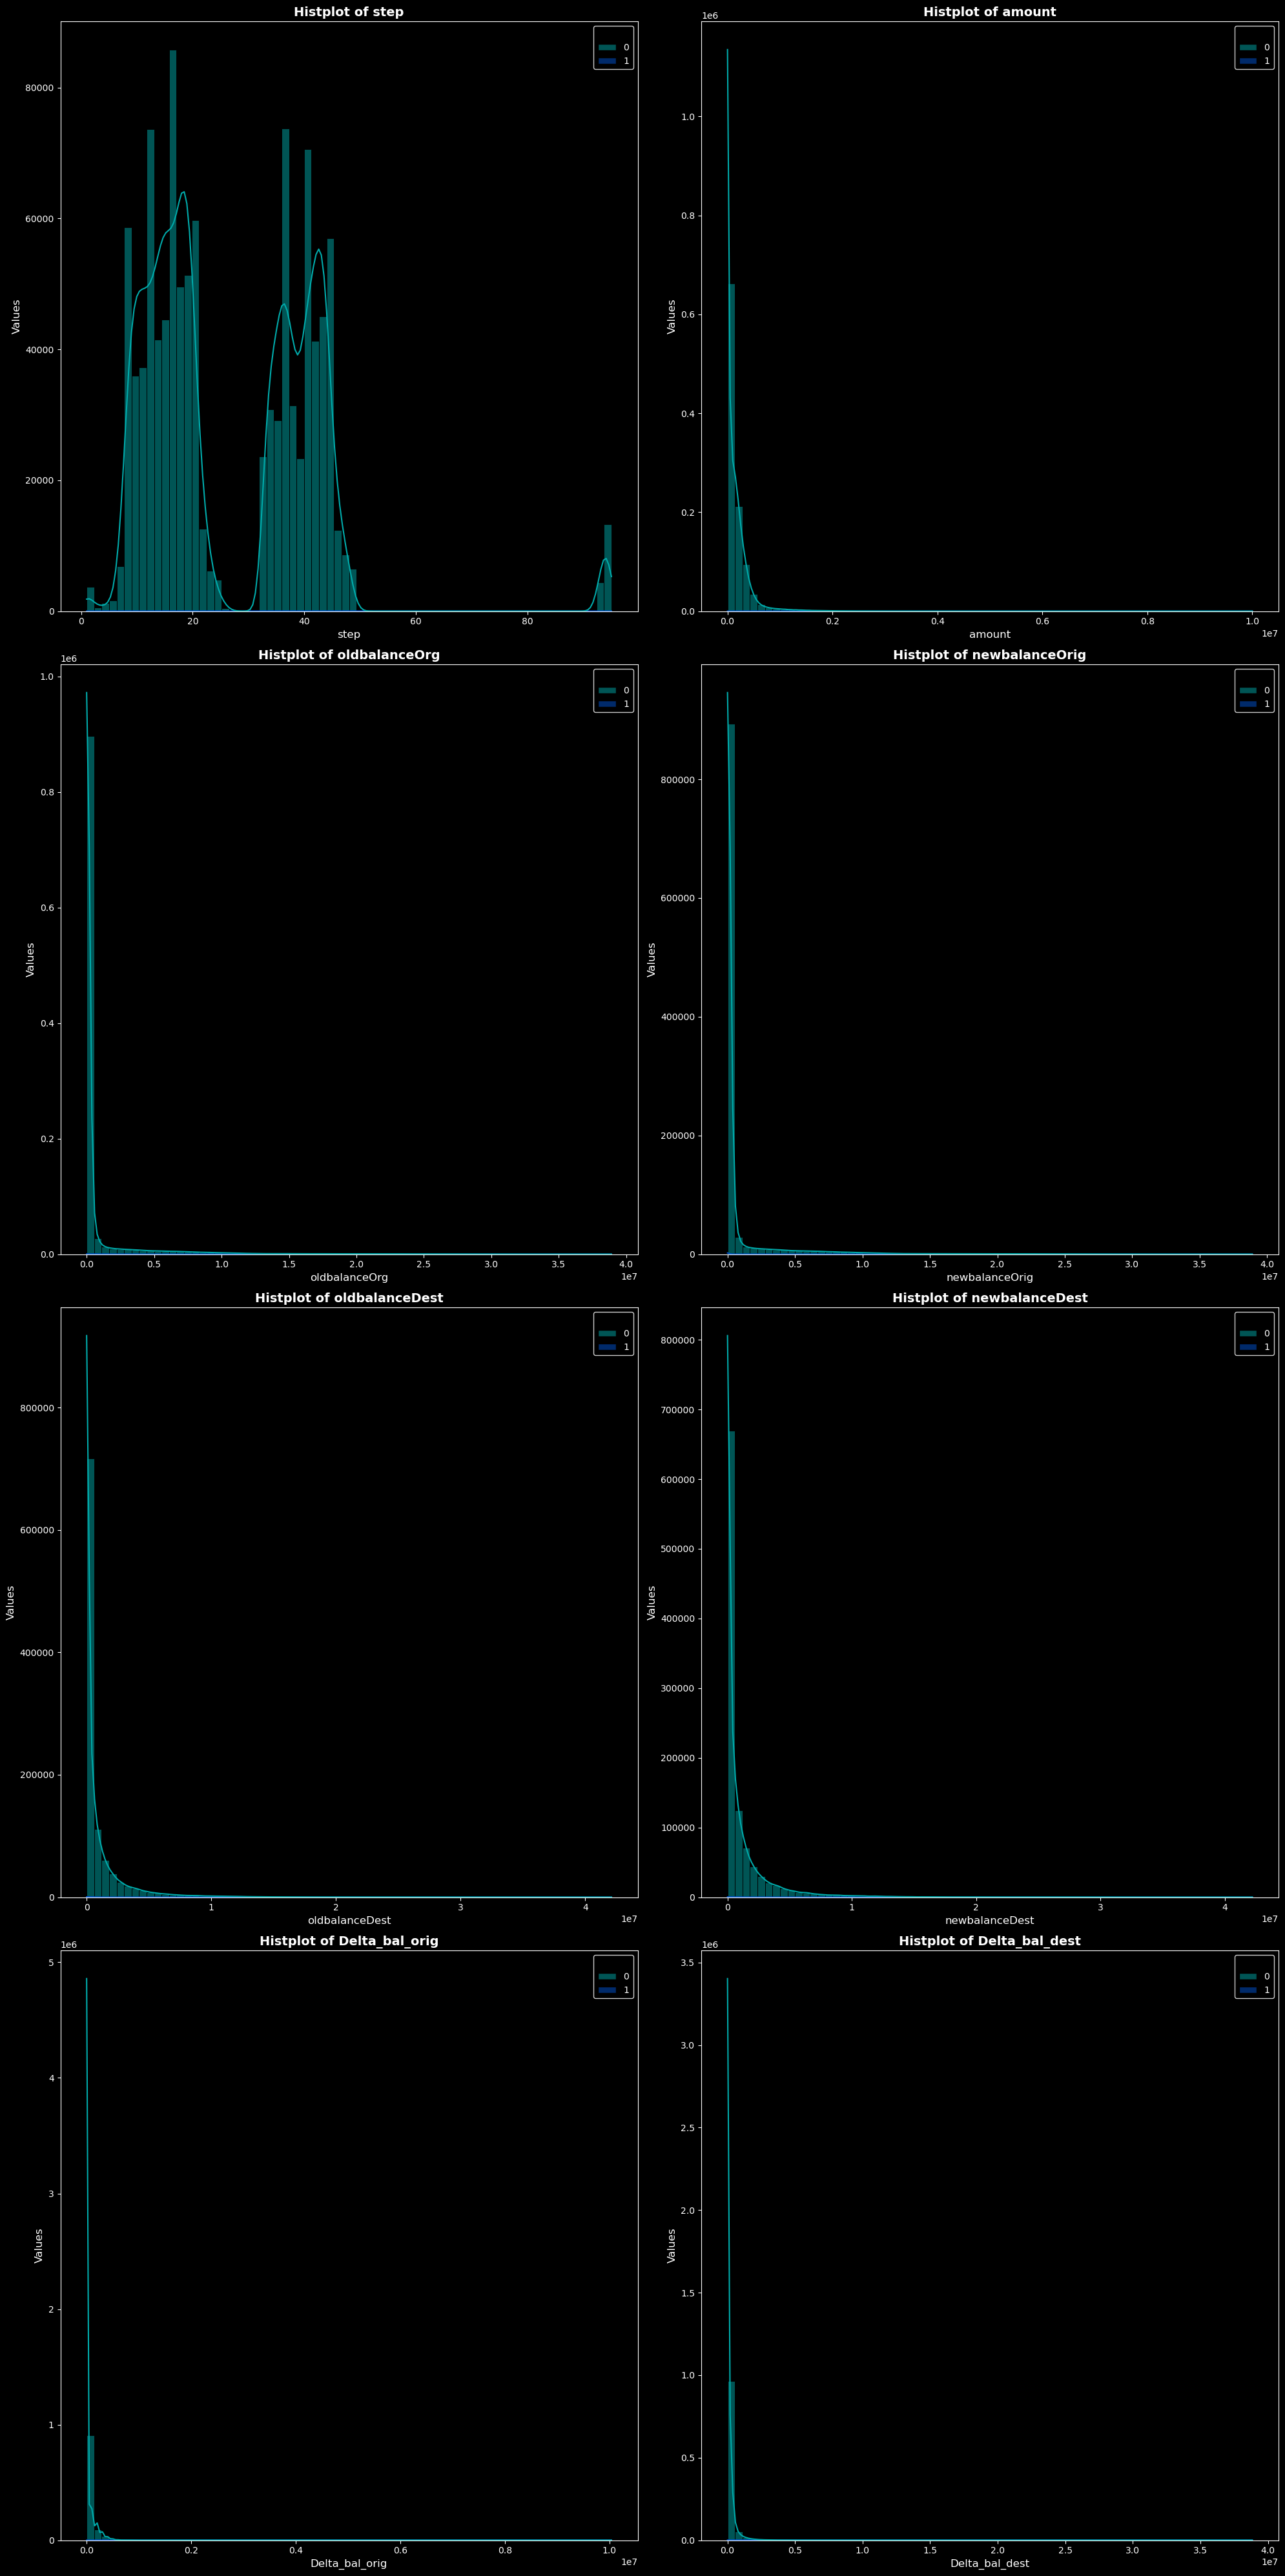

In [29]:
plot_hist(df)

<Axes: >

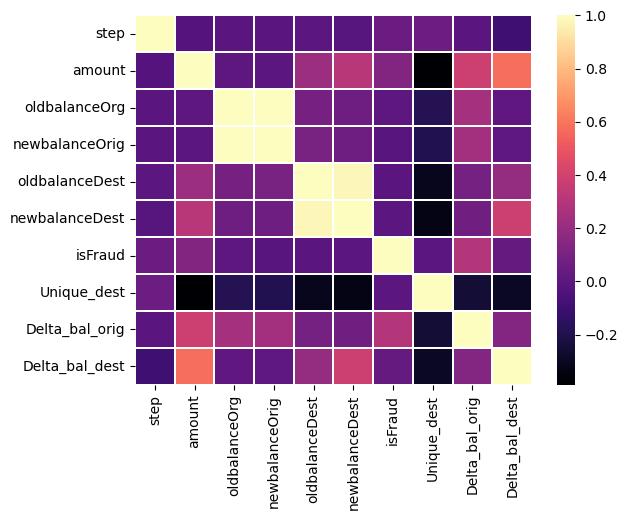

In [30]:
sns.heatmap(df.select_dtypes(include='number').corr(),cmap='magma',linecolor='white',linewidths=1.2)

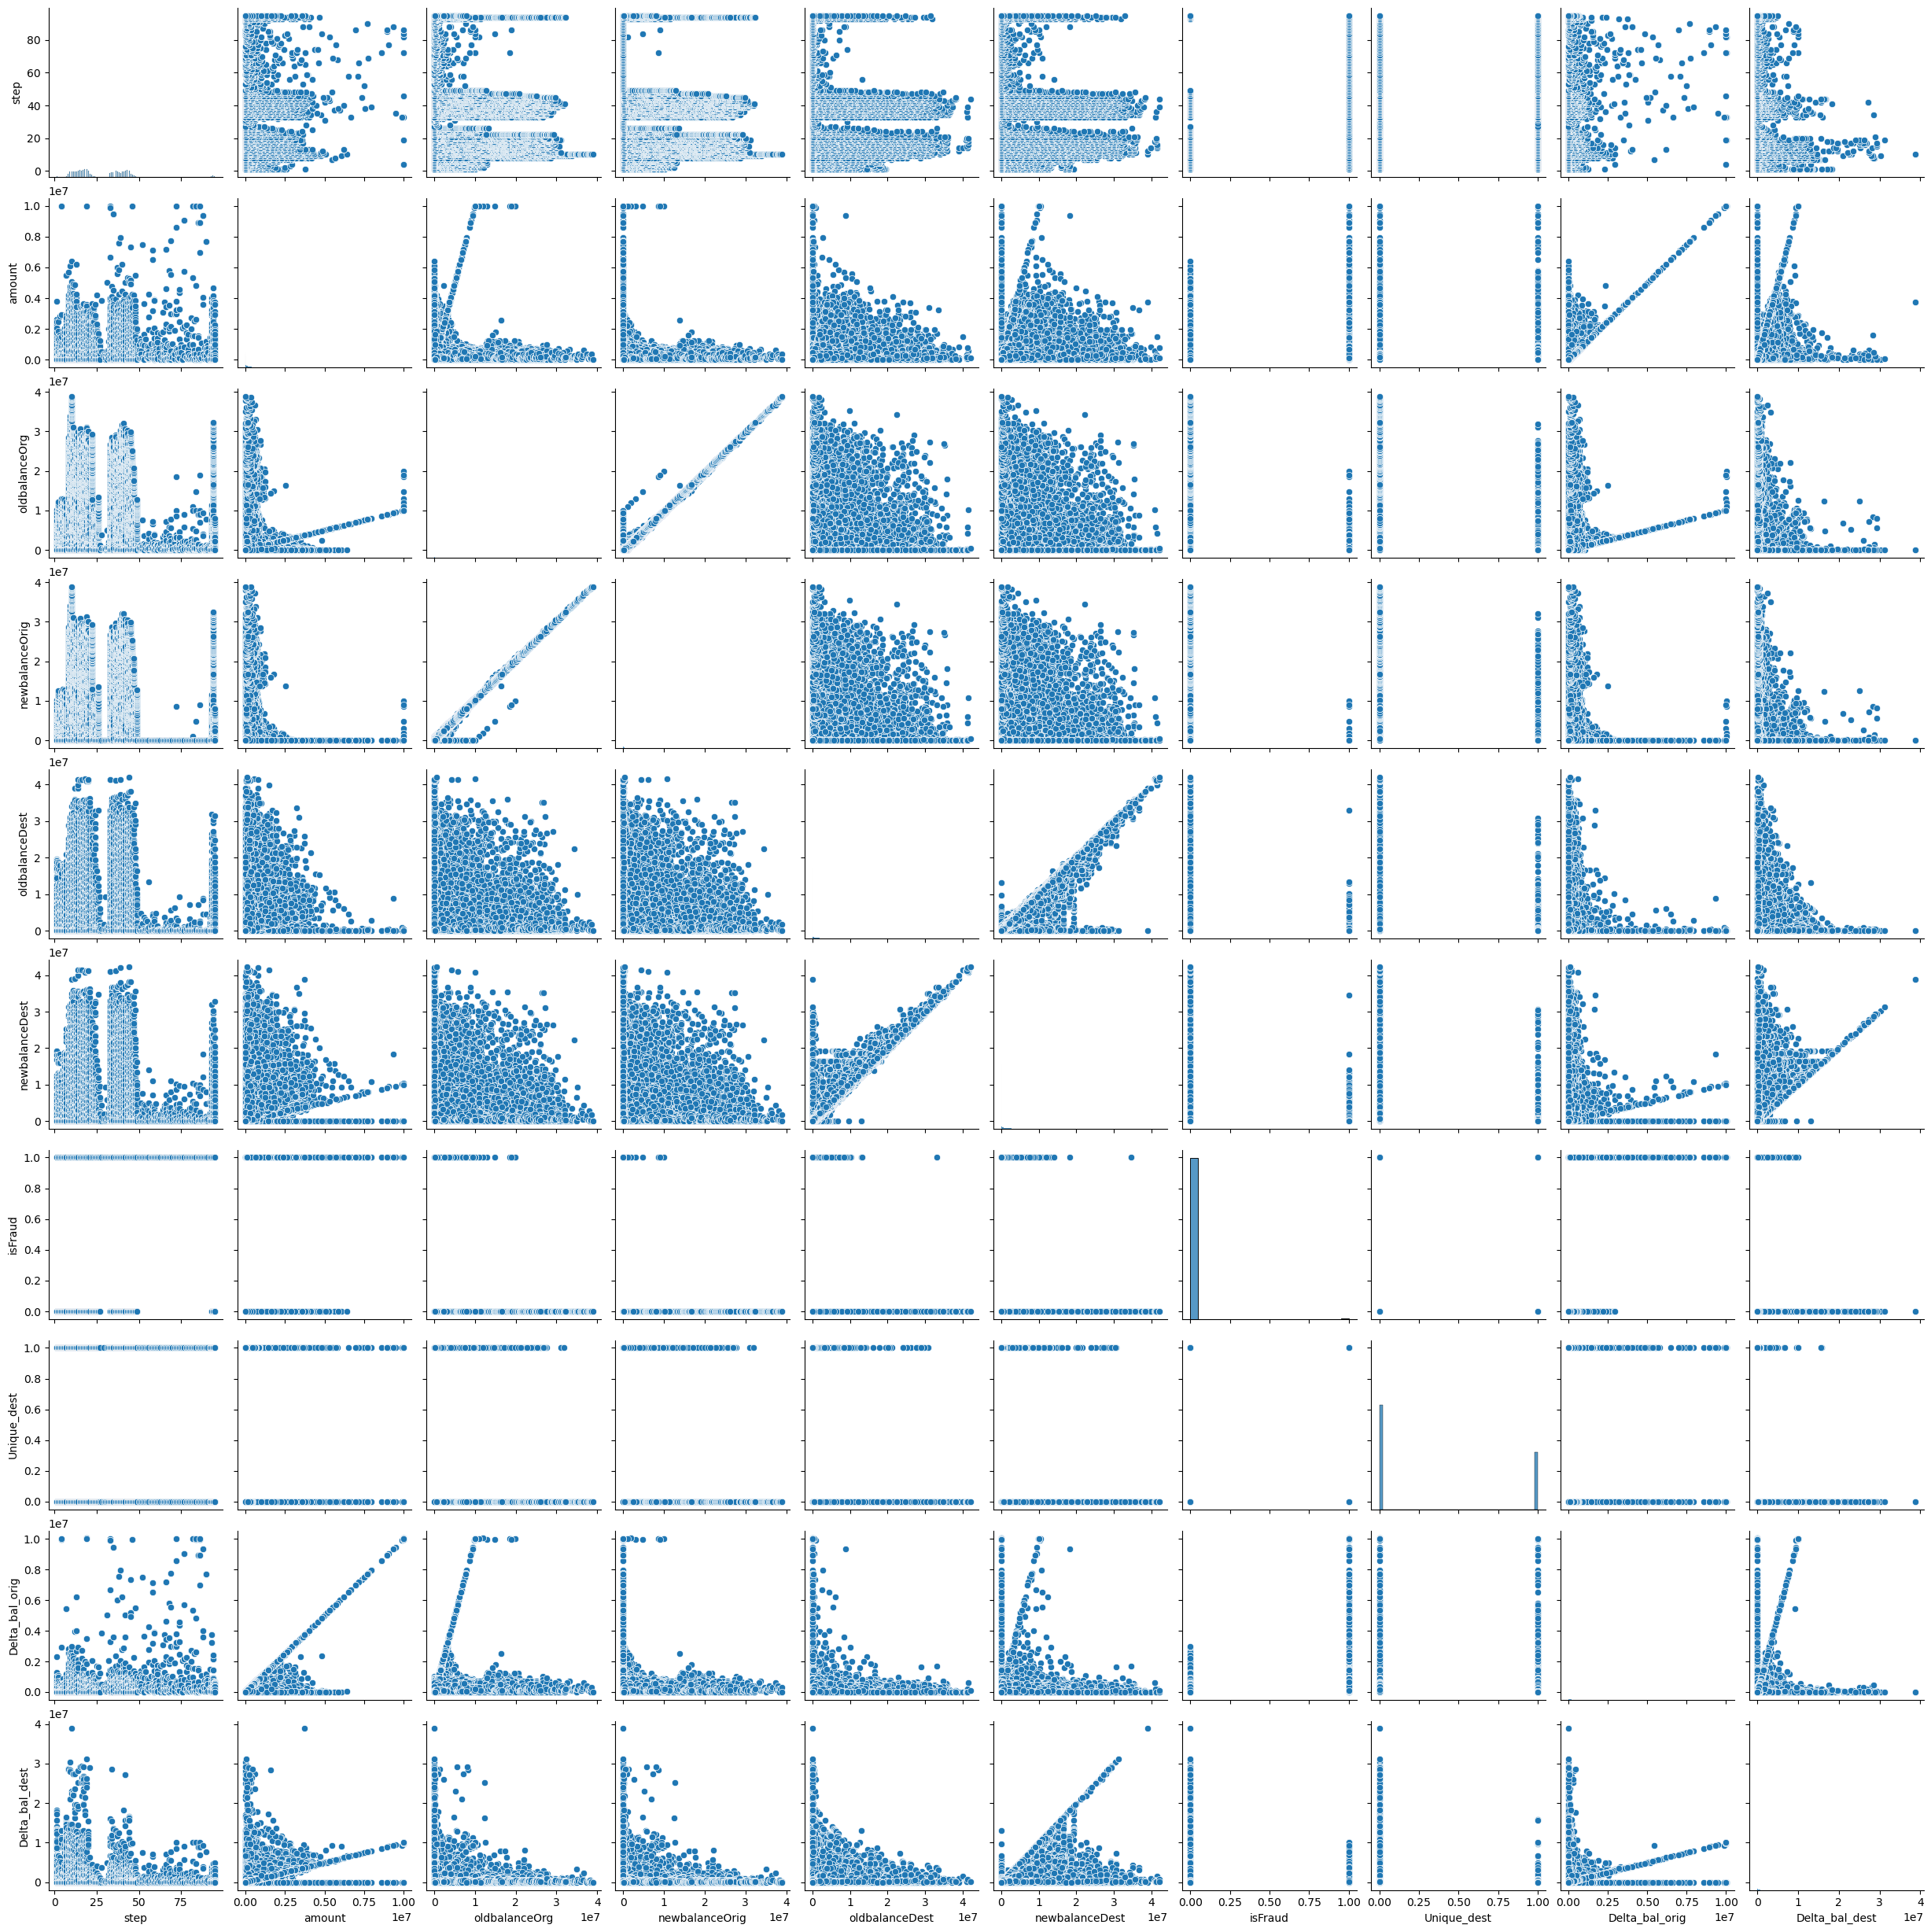

In [31]:
sns.pairplot(df.select_dtypes(include='number'))

### Encoding categorical variables

In [32]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()
for col in cat_cols:
    df[col] = lbl_en.fit_transform(df[col])

In [33]:
df.describe().T

count          mean           std  min         25%  \
step            1048460.0  2.696611e+01  1.562338e+01  1.0     15.0000   
type            1048460.0  1.713258e+00  1.345013e+00  0.0      1.0000   
amount          1048460.0  1.586837e+05  2.649507e+05  0.1  12154.6225   
oldbalanceOrg   1048460.0  8.741054e+05  2.971899e+06  0.0      0.0000   
newbalanceOrig  1048460.0  8.939069e+05  3.008422e+06  0.0      0.0000   
oldbalanceDest  1048460.0  9.782673e+05  2.296884e+06  0.0      0.0000   
newbalanceDest  1048460.0  1.114320e+06  2.416697e+06  0.0      0.0000   
isFraud         1048460.0  1.089217e-03  3.298532e-02  0.0      0.0000   
Dest_0          1048460.0  3.374072e-01  4.728253e-01  0.0      0.0000   
Unique_dest     1048460.0  3.540898e-01  4.782368e-01  0.0      0.0000   
Delta_bal_orig  1048460.0  5.380846e+04  1.259576e+05  0.0      0.0000   
Delta_bal_dest  1048460.0  2.014122e+05  4.817349e+05  0.0      0.0000   

                       50%           75%          max  
step                20.000  3.900000e+01        95.00  
type                 1.000  3.000000e+00         4.00  
amount           76369.430  2.137750e+05  10000000.00  
oldbalanceOrg    16010.000  1.366941e+05  38900000.00  
newbalanceOrig       0.000  1.746472e+05  38900000.00  
oldbalanceDest  126487.940  9.160748e+05  42100000.00  
newbalanceDest  218378.400  1.150083e+06  42200000.00  
isFraud              0.000  0.000000e+00         1.00  
Dest_0               0.000  1.000000e+00         1.00  
Unique_dest          0.000  1.000000e+00         1.00  
Delta_bal_orig    7031.525  5.272194e+04  10038991.68  
Delta_bal_dest   70052.790  2.370307e+05  38845816.54

In [34]:
for col in cat_cols:
    df[col] = df[col].astype('int8')

In [35]:
df['step'] = df['step'].astype('int8')
df['isFraud'] = df['isFraud'].astype('int8')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048460 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048460 non-null  int8   
 1   type            1048460 non-null  int8   
 2   amount          1048460 non-null  float64
 3   oldbalanceOrg   1048460 non-null  float64
 4   newbalanceOrig  1048460 non-null  float64
 5   oldbalanceDest  1048460 non-null  float64
 6   newbalanceDest  1048460 non-null  float64
 7   isFraud         1048460 non-null  int8   
 8   Dest_0          1048460 non-null  int8   
 9   Unique_dest     1048460 non-null  int8   
 10  Delta_bal_orig  1048460 non-null  float64
 11  Delta_bal_dest  1048460 non-null  float64
dtypes: float64(7), int8(5)
memory usage: 69.0 MB


In [37]:
numerical_cols_updated = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','Delta_bal_orig','Delta_bal_dest']
for col in numerical_cols_updated:
    df[col] = df[col].astype('float32')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048460 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048460 non-null  int8   
 1   type            1048460 non-null  int8   
 2   amount          1048460 non-null  float32
 3   oldbalanceOrg   1048460 non-null  float32
 4   newbalanceOrig  1048460 non-null  float32
 5   oldbalanceDest  1048460 non-null  float32
 6   newbalanceDest  1048460 non-null  float32
 7   isFraud         1048460 non-null  int8   
 8   Dest_0          1048460 non-null  int8   
 9   Unique_dest     1048460 non-null  int8   
 10  Delta_bal_orig  1048460 non-null  float32
 11  Delta_bal_dest  1048460 non-null  float32
dtypes: float32(7), int8(5)
memory usage: 41.0 MB


### Splitting data

In [39]:
X = df.drop('isFraud',axis=1)
y = df['isFraud']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15,stratify=y_train)

In [41]:
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)
X_val = st_sclr.transform(X_val)

In [42]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,f1_score

In [43]:
#defining a function to train model
def train_model(model,X_train,y_train,X_test=X_test,y_test=y_test):
    #fitting model
    model.fit(X_train,y_train)
    #predicting on X_test
    pred_model = model.predict(X_test)
    print(classification_report(y_test,pred_model))
    #calculating all metrics
    f_1 = f1_score(y_test,pred_model)
    roc_auc = roc_auc_score(y_test,pred_model)
    accuracy = accuracy_score(y_test,pred_model)
    print('\n')
    print(f'F1 score: {f_1:.4f}')
    print('\n')
    print(f'ROC AUC score: {roc_auc:.4f}')
    print('\n')
    print(f'Accuracy: {accuracy:.4f}')

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
train_model(dtree,X_train,y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.84      0.81      0.83       343

    accuracy                           1.00    314538
   macro avg       0.92      0.91      0.91    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.8267


ROC AUC score: 0.9066


Accuracy: 0.9996


### Oversampling

In [46]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN,SVMSMOTE,KMeansSMOTE
from collections import Counter

In [47]:
counter = Counter(y_train)
print("Before",counter)
ada = ADASYN()
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)
counter = Counter(y_train_ada)
print("After",counter)
X_train_ada,X_val_ada,y_train_ada,y_val_ada = train_test_split(X_train_ada,y_train_ada,test_size=0.2,stratify=y_train_ada)

Before Counter({0: 623154, 1: 679})
After Counter({1: 623179, 0: 623154})


In [48]:
counter = Counter(y_train)
print("Before",counter)
smote = SMOTE()
X_train_smt,y_train_smt = smote.fit_resample(X_train,y_train)
counter = Counter(y_train_smt)
print("After",counter)
X_train_smt,X_val_smt,y_train_smt,y_val_smt = train_test_split(X_train_smt,y_train_smt,test_size=0.2,stratify=y_train_smt)

Before Counter({0: 623154, 1: 679})
After Counter({0: 623154, 1: 623154})


In [49]:
counter = Counter(y_train)
print("Before",counter)
rnd = RandomOverSampler()
X_train_rnd,y_train_rnd = rnd.fit_resample(X_train,y_train)
counter = Counter(y_train_rnd)
print("After",counter)
X_train_rnd,X_val_rnd,y_train_rnd,y_val_rnd = train_test_split(X_train_rnd,y_train_rnd,test_size=0.2,stratify=y_train_rnd)

Before Counter({0: 623154, 1: 679})
After Counter({0: 623154, 1: 623154})


In [50]:
counter = Counter(y_train)
svm = SVMSMOTE()
X_train_svm,y_train_svm = svm.fit_resample(X_train,y_train)
counter = Counter(y_train_svm)
print("After",counter)
X_train_svm,X_val_svm,y_train_svm,y_val_svm = train_test_split(X_train_svm,y_train_svm,test_size=0.2,stratify=y_train_svm)

After Counter({0: 623154, 1: 623154})


### Oversampled : Ada,smt,rnd,svm

In [76]:
dtree = DecisionTreeClassifier()
train_model(dtree,X_train_ada,y_train_ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.40      0.83      0.54       343

    accuracy                           1.00    314538
   macro avg       0.70      0.92      0.77    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.5427


ROC AUC score: 0.9162


Accuracy: 0.9985


In [77]:
dtree = DecisionTreeClassifier()
train_model(dtree,X_train_smt,y_train_smt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.43      0.82      0.57       343

    accuracy                           1.00    314538
   macro avg       0.72      0.91      0.78    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.5683


ROC AUC score: 0.9090


Accuracy: 0.9986


In [78]:
dtree = DecisionTreeClassifier()
train_model(dtree,X_train_rnd,y_train_rnd)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.83      0.78      0.81       343

    accuracy                           1.00    314538
   macro avg       0.92      0.89      0.90    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.8060


ROC AUC score: 0.8906


Accuracy: 0.9996


In [79]:
dtree = DecisionTreeClassifier()
train_model(dtree,X_train_svm,y_train_svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.80      0.79      0.79       343

    accuracy                           1.00    314538
   macro avg       0.90      0.89      0.90    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.7936


ROC AUC score: 0.8949


Accuracy: 0.9996


In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
train_model(rfc,X_train,y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.99      0.76      0.86       343

    accuracy                           1.00    314538
   macro avg       0.99      0.88      0.93    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.8600


ROC AUC score: 0.8805


Accuracy: 0.9997


In [81]:
rfc = RandomForestClassifier()
train_model(rfc,X_train_ada,y_train_ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.61      0.84      0.71       343

    accuracy                           1.00    314538
   macro avg       0.81      0.92      0.85    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.7092


ROC AUC score: 0.9210


Accuracy: 0.9992


In [82]:
rfc = RandomForestClassifier()
train_model(rfc,X_train_smt,y_train_smt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.65      0.86      0.74       343

    accuracy                           1.00    314538
   macro avg       0.82      0.93      0.87    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.7368


ROC AUC score: 0.9283


Accuracy: 0.9993


In [83]:
rfc = RandomForestClassifier()
train_model(rfc,X_train_rnd,y_train_rnd)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.97      0.76      0.85       343

    accuracy                           1.00    314538
   macro avg       0.98      0.88      0.93    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.8534


ROC AUC score: 0.8819


Accuracy: 0.9997


In [84]:
rfc = RandomForestClassifier()
train_model(rfc,X_train_svm,y_train_svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.93      0.79      0.86       343

    accuracy                           1.00    314538
   macro avg       0.97      0.90      0.93    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.8580


ROC AUC score: 0.8965


Accuracy: 0.9997


In [85]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
train_model(lg_model,X_train,y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.92      0.39      0.55       343

    accuracy                           1.00    314538
   macro avg       0.96      0.69      0.77    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.5451


ROC AUC score: 0.6939


Accuracy: 0.9993


In [86]:
lg_model = LogisticRegression()
train_model(lg_model,X_train_ada,y_train_ada)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    314195
           1       0.01      0.96      0.02       343

    accuracy                           0.88    314538
   macro avg       0.50      0.92      0.48    314538
weighted avg       1.00      0.88      0.93    314538



F1 score: 0.0171


ROC AUC score: 0.9209


Accuracy: 0.8797


In [87]:
lg_model = LogisticRegression()
train_model(lg_model,X_train_rnd,y_train_rnd)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    314195
           1       0.02      0.90      0.04       343

    accuracy                           0.95    314538
   macro avg       0.51      0.92      0.51    314538
weighted avg       1.00      0.95      0.97    314538



F1 score: 0.0391


ROC AUC score: 0.9250


Accuracy: 0.9519


In [88]:
lg_model = LogisticRegression()
train_model(lg_model,X_train_smt,y_train_smt)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    314195
           1       0.02      0.90      0.04       343

    accuracy                           0.95    314538
   macro avg       0.51      0.93      0.51    314538
weighted avg       1.00      0.95      0.97    314538



F1 score: 0.0400


ROC AUC score: 0.9283


Accuracy: 0.9527


In [89]:
lg_model = LogisticRegression()
train_model(lg_model,X_train_svm,y_train_svm)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    314195
           1       0.04      0.94      0.07       343

    accuracy                           0.97    314538
   macro avg       0.52      0.96      0.53    314538
weighted avg       1.00      0.97      0.98    314538



F1 score: 0.0690


ROC AUC score: 0.9556


Accuracy: 0.9724


In [53]:
from sklearn.svm import SVC
svm = SVC()
train_model(svm,X_train,y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314195
           1       0.99      0.56      0.72       343

    accuracy                           1.00    314538
   macro avg       1.00      0.78      0.86    314538
weighted avg       1.00      1.00      1.00    314538



F1 score: 0.7188


ROC AUC score: 0.7813


Accuracy: 0.9995


In [ ]:
svm = SVC()
train_model(svm,X_train_rnd,y_train_rnd)

In [ ]:
svm = SVC()
train_model(svm,X_train_svm,y_train_svm)